## Assignment 3 Matplotlib

**Instructions:** <br>
a. write your answer after `# your answer here`. Do not delete any code that is in the cell, as the code facilitates checking your answers. If you happen to delete any code that prevents expected outputs, you may lose points. <br>
b. make sure the plot shows all the information necessary, including but not limited to **title, axis labels with units, legend**, etc. <br>
c. when you finish the assignment, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your assignment. <br>
d. upload your .ipynb file. <br>
<br>
Each subquestion for Question 1 and 2 is worth 5 points (30 points in total), and each subquestion for Question 3 is worth 10 points (30 points in total). The total score for assignment 3 is 60 points.

**Policy:** <br>
Assignment submitted late will receive a late penalty (30% point reduction), regardless of the reason. Empty assignment or no submission receives 0 point.

**Make sure you save your work and submit the correct version! Empty assignments receive zero point and no revision is allowed.** <br>

### Question 1
Load the following dataset from seaborn and use functions in seaborn to draw plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pg = sns.load_dataset("penguins")

1.(1) Data exploration: remove NA rows and draw pair plots (pairwise variable plots). Use different colors to denote different species.

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'color'],
      dtype='object')
0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object


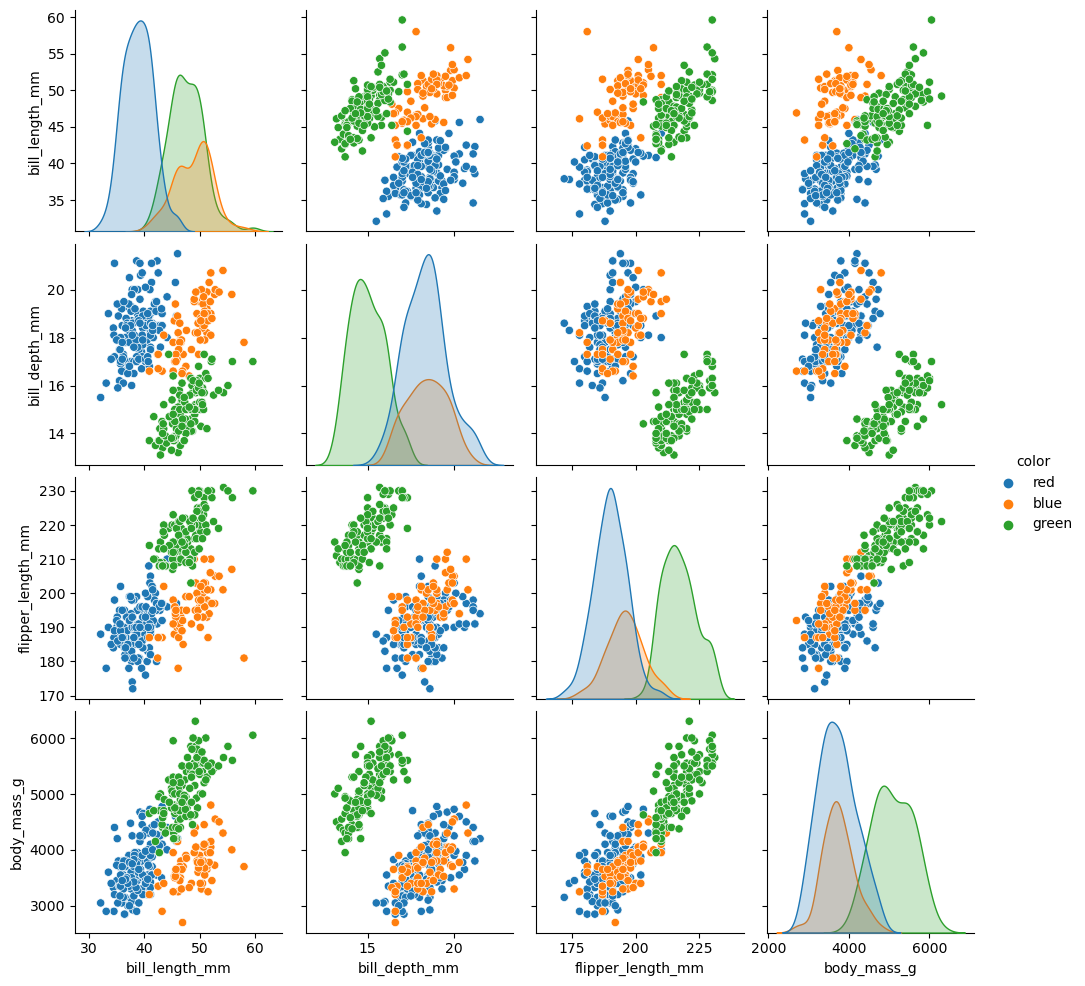

In [26]:
#your answer here
print(pg.columns)
print(pg.species)
pg = pg.dropna()
species_colors = {"Adelie": "red", "Chinstrap": "blue", "Gentoo": "green"}
pg["color"] = pg["species"].map(species_colors)
sns.pairplot(pg, hue="color")
plt.show()

1.(2) Draw violin plot on bill length over species, using different colors for the species.

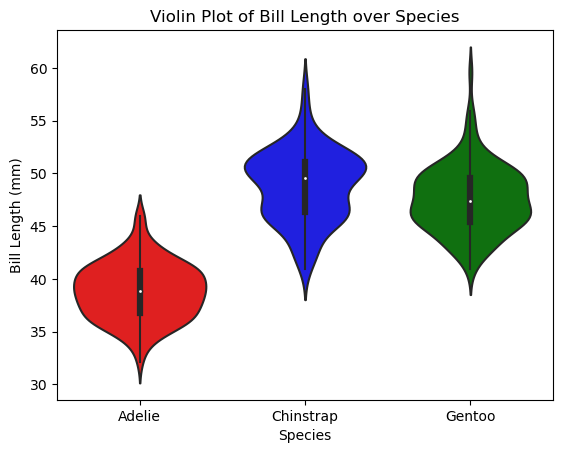

In [3]:
#your answer here
sns.violinplot(data=pg, x="species", y="bill_length_mm", palette=species_colors)
plt.xlabel("Species")
plt.ylabel("Bill Length (mm)")
plt.title("Violin Plot of Bill Length over Species")
plt.show()

1.(3) Draw a joint density plot (kernel density estimate) of bill length and bill depth.

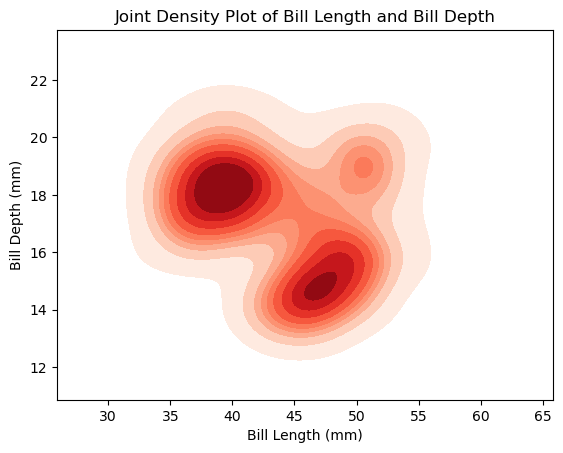

In [27]:
#your answer here
fig, ax = plt.subplots()
sns.kdeplot(data=pg, x="bill_length_mm", y="bill_depth_mm", fill=True, cmap="Reds", ax=ax)
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.set_title("Joint Density Plot of Bill Length and Bill Depth")
plt.show()


1.(4) Draw a regression plot of bill length over body mass, which shows a scatterplot, a fitted line, and two histograms for the two variables.

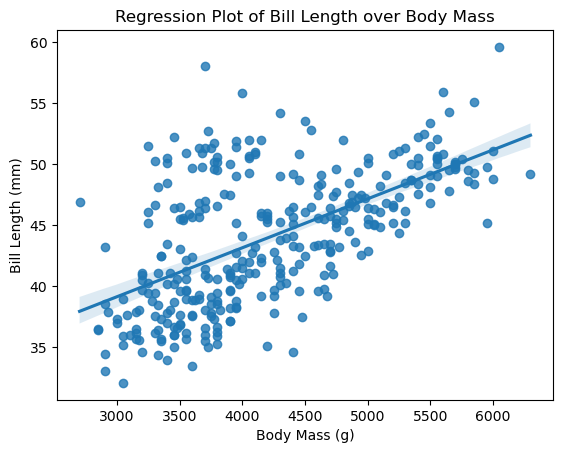

In [8]:
#your answer here
fig, ax = plt.subplots()
sns.regplot(data=pg, x="body_mass_g", y="bill_length_mm", ax=ax)
ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Bill Length (mm)")
ax.set_title("Regression Plot of Bill Length over Body Mass")
plt.show()

### Question 2
Load a dataset from Seaborn and answer the following questions.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
att = sns.load_dataset("attention")

2. (1) Draw a facet histogram, with two rows for the attention group and three columns for the solutions.

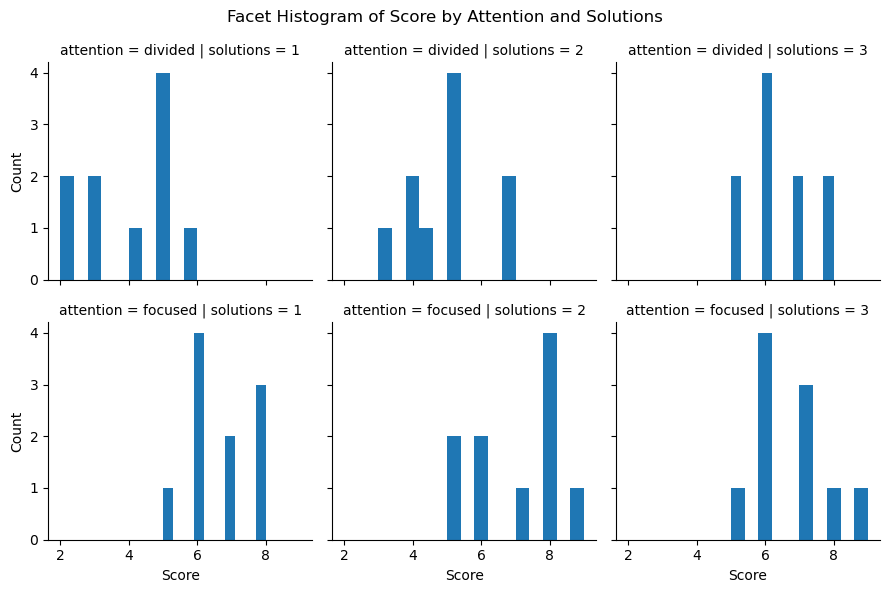

In [28]:
#your answer here
g = sns.FacetGrid(att, row="attention", col="solutions")
g.map(plt.hist, "score")
g.set_axis_labels("Score", "Count")
g.fig.suptitle("Facet Histogram of Score by Attention and Solutions")
plt.tight_layout()
plt.show()

2. (2) Draw a factor boxplot of scores (y-axis) over attention group (x-axis). In each attention group, show the boxplot over the three solution groups (legend).

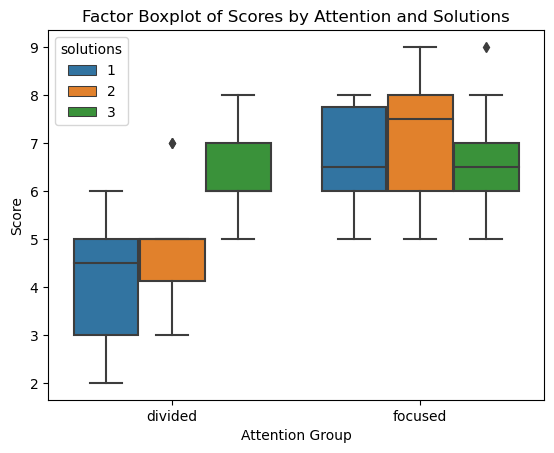

In [30]:
#your answer here
fig, ax = plt.subplots()
sns.boxplot(data=att, x="attention", y="score", hue="solutions", ax=ax)
ax.set_xlabel("Attention Group")
ax.set_ylabel("Score")
ax.set_title("Factor Boxplot of Scores by Attention and Solutions")
plt.show()

### Question 3

First, download the Olympic medal dataset (medals.csv). Use the following code to load the dataset.

The columns give information on: <br>
summer Olympic games--number of games and summer medals;  <br>
winter Olympic games--number of games and winter medals;  <br>
total Olympic games--number of games and total medals.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('medals.csv', index_col=0, skiprows=0)

3. (1) Plot a histogram on the total number of gold medals in summer and the total number of gold medals in winter in the range between 0 and 100 (do not include 0). 

Index([' Summer', 'Gold', 'Silver', 'Bronze', 'Total', ' Winter', 'Gold.1',
       'Silver.1', 'Bronze.1', 'Total.1', ' Games', 'Gold.2', 'Silver.2',
       'Bronze.2', 'Combined total', 'ID'],
      dtype='object')


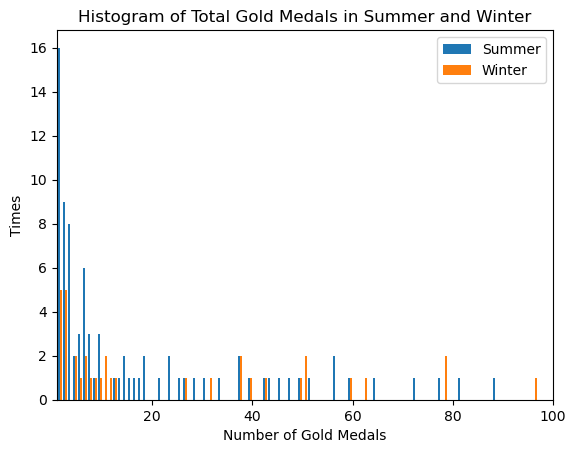

In [34]:
# Your answer here
print(df.columns)
summer_gold = df[df['Gold'] > 0]['Gold']
winter_gold = df[df['Gold.1'] > 0]['Gold.1']
fig, ax = plt.subplots()
ax.hist([summer_gold, winter_gold], bins=range(1, 101), label=['Summer', 'Winter'])
ax.set_xlabel('Number of Gold Medals')
ax.set_ylabel('Times')
ax.set_title('Histogram of Total Gold Medals in Summer and Winter')
ax.set_xlim(1, 100)
ax.legend()
plt.show()


3. (2) For the top three countries with the largest number of combined medals (Combined Total), draw a line chart about the combined gold, silver, and bronze medals (Gold.2, Silver.2, Bronze.2). Use different styles for the line type, point type, color, and line width.

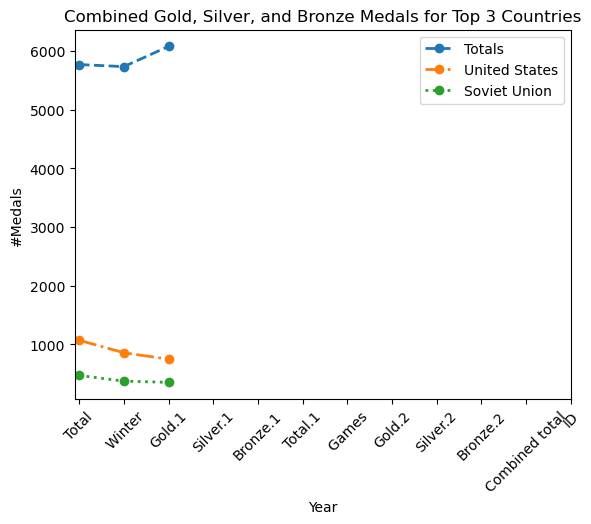

In [38]:
# Your answer here
sorted = df.sort_values(by='Combined total', ascending=False)
top_3_countries = sorted.head(3)
top_3_country_medals = top_3_countries[['Gold.2', 'Silver.2', 'Bronze.2']]
fig, ax = plt.subplots()
top_3_country_medals.T.plot(ax=ax, kind='line', style=['--', '-.', ':'], marker='o', linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('#Medals')
ax.set_title('Combined Gold, Silver, and Bronze Medals for Top 3 Countries')
years = df.columns[4:]
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=45)
ax.legend()
plt.show()

3. (3) For the top five countries with the largest number of combined medals (Combined Total), draw a stacked bar chart about the combined gold, silver, and bronze medals (Gold.2, Silver.2, Bronze.2).

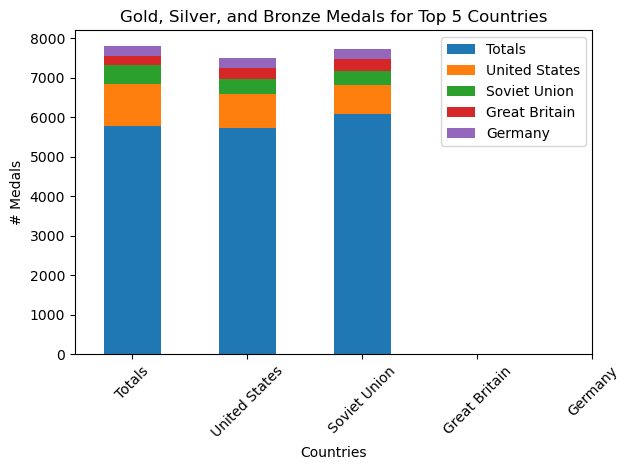

In [45]:
# Your answer here
sorted = df.sort_values(by='Combined total', ascending=False)
top_5_countries = sorted.head(5)
top_5_country_medals = top_5_countries[['Gold.2', 'Silver.2', 'Bronze.2']]
fig, ax = plt.subplots()
top_5_country_medals.T.plot(ax=ax, kind='bar', stacked=True)
ax.set_xlabel('Countries')
ax.set_ylabel('# Medals')
ax.set_title('Gold, Silver, and Bronze Medals for Top 5 Countries')
countries = top_5_countries.index
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=45)
plt.tight_layout()
plt.show()